In [2]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import time

In [3]:
# Read CSV file into DataFrame
gender_pop= pd.read_csv('Resources/gender_pop_jan_full.csv')
gender_transpose= gender_pop.T
gender_transpose.rename(columns=gender_transpose.iloc[0], inplace = True)
gender_drop=gender_transpose.drop(gender_transpose.index[0])
gender_drop['Male']=gender_drop['Male'].astype(float)
gender_drop['Female']=gender_drop['Female'].astype(float)
gender_drop['Total']=gender_drop['Total'].astype(float)
gender_index=gender_drop.set_index(gender_drop.index.map(lambda x: pd.to_datetime(x, errors='ignore')))
gender_index.head()

,Male,Female,Total
1925-01-01,58399000.0,56570000.0,114969000.0
1926-01-01,59200500.0,57412500.0,116613000.0
1927-01-01,59992500.0,58223500.0,118216000.0
1928-01-01,60749000.0,59023000.0,119772000.0
1929-01-01,61390500.0,59747500.0,121138000.0


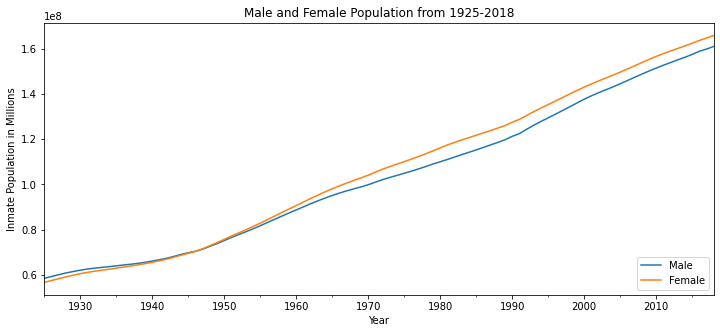

In [4]:
#Plot Gender Data
male_line=gender_index['Male'].plot(figsize=(12,5), label="Male")
female_line=gender_index['Female'].plot(figsize=(12,5), label="Female")
plt.xlabel("Year")
plt.ylabel("Inmate Population in Millions")
plt.legend(loc="lower right")
plt.title('Male and Female Population from 1925-2018')
plt.savefig("Images/Gender_line.png")
plt.show()


In [5]:
#Run Adfuller test
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag ='AIC')
    print("1. ADF: ", dftest[0])
    print("2. P-value : ", dftest[1])
    print("3. Num of Lags :", dftest[2])
    print("4. Num of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)

In [6]:
#Adf results male
ad_test(gender_index['Male'])

1. ADF:  0.3884758267904209
2. P-value :  0.9810588265100234
3. Num of Lags : 2
4. Num of Observations Used For ADF Regression and Critical Values Calculation : 91
5. Critical Values :
	 1% :  -3.50434289821397
	 5% :  -2.8938659630479413
	 10% :  -2.5840147047458037


In [7]:
#Adf results female
ad_test(gender_index['Female'])

1. ADF:  -0.18337069358710142
2. P-value :  0.9404749760519336
3. Num of Lags : 1
4. Num of Observations Used For ADF Regression and Critical Values Calculation : 92
5. Critical Values :
	 1% :  -3.503514579651927
	 5% :  -2.893507960466837
	 10% :  -2.583823615311909


In [8]:
#Import auto_arima
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

In [9]:
#Fit male with auto_arima
male_fit= auto_arima(gender_index['Male'], trace=True,
                            suppress_warnings=True)
male_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2445.394, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2437.417, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2439.450, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2439.399, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2441.406, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2439.318, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.205 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1217.709
Date:                Fri, 12 Mar 2021   AIC                           2437.417
Time:                        19:25:03   BIC                           2439.939
Sample:                             0   HQIC                          2438.435
                                 - 94                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.798e+10   1.14e+09     15.785      0.000    1.57e+10    2.02e+10
===================================================================================
Ljung-Box (L1) (Q):                   4.15   Jarque-Bera (JB):               293.50
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               2.92   Skew:                             1.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
#Fit female with auto_arima
female_fit= auto_arima(gender_index['Female'], trace=True,
                            suppress_warnings=True)
female_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=2373.849, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=2365.936, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=2367.785, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=2367.811, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=2368.567, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=2367.793, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.141 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   94
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1181.968
Date:                Fri, 12 Mar 2021   AIC                           2365.936
Time:                        19:25:03   BIC                           2368.458
Sample:                             0   HQIC                          2366.954
                                 - 94                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.265e+09   6.52e+08     12.677      0.000    6.99e+09    9.54e+09
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):               111.42
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.81   Skew:                             1.49
Prob(H) (two-sided):                  0.10   Kurtosis:                         7.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
#Import ARIMA from statsmodels
from statsmodels.tsa.arima_model import ARIMA

In [12]:
#Get train test split
print(gender_index.shape)
train=gender_index.iloc[:]-30
test=gender_index.iloc[-30:]
print(train.shape, test.shape)
train

(94, 3)
(94, 3) (30, 3)


,Male,Female,Total
1925-01-01,58398970.0,56569970.0,114968970.0
1926-01-01,59200470.0,57412470.0,116612970.0
1927-01-01,59992470.0,58223470.0,118215970.0
1928-01-01,60748970.0,59022970.0,119771970.0
1929-01-01,61390470.0,59747470.0,121137970.0
...,...,...,...
2014-01-01,156254525.0,161270046.0,317524601.0
2015-01-01,157494909.0,162463076.0,319958015.0
2016-01-01,158894817.0,163666430.0,322311278.0
2017-01-01,159873920.0,164782989.0,324656939.0


In [13]:
#Arima female fit
model=ARIMA(train['Female'], order = (0,2,0))
female_model = model.fit()
female_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D2.Female   No. Observations:                   92
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1181.896
Method:                           css   S.D. of innovations          91836.202
Date:                Fri, 12 Mar 2021   AIC                           2367.793
Time:                        19:25:05   BIC                           2372.836
Sample:                    01-01-1927   HQIC                          2369.829
                         - 01-01-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3342.0870   9574.586      0.349      0.727   -1.54e+04    2.21e+04
==============================================================================
"""

In [14]:
#Arima male fit
model=ARIMA(train['Male'], order = (0,2,0))
male_model = model.fit()
male_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D2.Male   No. Observations:                   92
Model:                 ARIMA(0, 2, 0)   Log Likelihood               -1217.659
Method:                           css   S.D. of innovations         135467.126
Date:                Fri, 12 Mar 2021   AIC                           2439.318
Time:                        19:25:06   BIC                           2444.361
Sample:                    01-01-1927   HQIC                          2441.353
                         - 01-01-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3943.1304   1.41e+04      0.279      0.780   -2.37e+04    3.16e+04
==============================================================================
"""

In [15]:
#Get female predictions
start=len(train)
end=len(train)+len(test)-1
female_pred=female_model.predict(start=start, end=end, typ='levels')
print(female_pred)

2019-01-01    1.670863e+08
2020-01-01    1.682429e+08
2021-01-01    1.694029e+08
2022-01-01    1.705663e+08
2023-01-01    1.717330e+08
2024-01-01    1.729030e+08
2025-01-01    1.740763e+08
2026-01-01    1.752531e+08
2027-01-01    1.764331e+08
2028-01-01    1.776165e+08
2029-01-01    1.788032e+08
2030-01-01    1.799933e+08
2031-01-01    1.811867e+08
2032-01-01    1.823835e+08
2033-01-01    1.835836e+08
2034-01-01    1.847870e+08
2035-01-01    1.859938e+08
2036-01-01    1.872040e+08
2037-01-01    1.884174e+08
2038-01-01    1.896342e+08
2039-01-01    1.908544e+08
2040-01-01    1.920779e+08
2041-01-01    1.933047e+08
2042-01-01    1.945349e+08
2043-01-01    1.957684e+08
2044-01-01    1.970053e+08
2045-01-01    1.982455e+08
2046-01-01    1.994891e+08
2047-01-01    2.007360e+08
2048-01-01    2.019862e+08
Freq: AS-JAN, dtype: float64


In [16]:
#Get male predictions
start=len(train)
end=len(train)+len(test)-1
male_pred=male_model.predict(start=start, end=end, typ='levels')
print(male_pred)

2019-01-01    1.622064e+08
2020-01-01    1.633786e+08
2021-01-01    1.645547e+08
2022-01-01    1.657347e+08
2023-01-01    1.669187e+08
2024-01-01    1.681066e+08
2025-01-01    1.692985e+08
2026-01-01    1.704943e+08
2027-01-01    1.716940e+08
2028-01-01    1.728977e+08
2029-01-01    1.741054e+08
2030-01-01    1.753170e+08
2031-01-01    1.765325e+08
2032-01-01    1.777520e+08
2033-01-01    1.789754e+08
2034-01-01    1.802027e+08
2035-01-01    1.814340e+08
2036-01-01    1.826693e+08
2037-01-01    1.839085e+08
2038-01-01    1.851516e+08
2039-01-01    1.863987e+08
2040-01-01    1.876497e+08
2041-01-01    1.889047e+08
2042-01-01    1.901636e+08
2043-01-01    1.914264e+08
2044-01-01    1.926932e+08
2045-01-01    1.939639e+08
2046-01-01    1.952386e+08
2047-01-01    1.965172e+08
2048-01-01    1.977998e+08
Freq: AS-JAN, dtype: float64


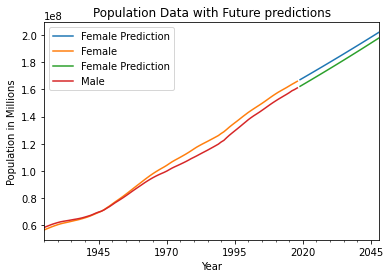

In [18]:
#Plot female and male predictions vs train models
female_pred.plot(legend=True, label="Female Prediction")
train['Female'].plot(legend=True)
male_pred.plot(legend=True, label="Female Prediction")
train['Male'].plot(legend=True)
plt.xlabel("Year")
plt.ylabel("Population in Millions")
plt.title('Population Data with Future predictions')
plt.savefig("Images/Gender_Prediction.png")
plt.show()


In [100]:
#Get RMSE for female data
from sklearn.metrics import mean_squared_error
from math import sqrt
female_rmse=sqrt(mean_squared_error(female_pred, test['Female']))
print(female_rmse)

37240336.83784475


In [101]:
#Get RMSE for male data
from sklearn.metrics import mean_squared_error
from math import sqrt
male_rmse=sqrt(mean_squared_error(male_pred, test['Male']))
print(male_rmse)

38089045.77685552


In [20]:
#Begin future predicitions for female data
female2=ARIMA(gender_index['Female'], order=(0,2,0))
female2=female2.fit()
gender_index.tail()

,Male,Female,Total
2014-01-01,156254555.0,161270076.0,317524631.0
2015-01-01,157494939.0,162463106.0,319958045.0
2016-01-01,158894847.0,163666460.0,322311308.0
2017-01-01,159873950.0,164783019.0,324656969.0
2018-01-01,161038218.0,165932991.0,326971209.0


In [21]:
#Begin future predicitions for male data
male2=ARIMA(gender_index['Male'], order=(0,2,0))
male2=male2.fit()
gender_index.tail()

,Male,Female,Total
2014-01-01,156254555.0,161270076.0,317524631.0
2015-01-01,157494939.0,162463106.0,319958045.0
2016-01-01,158894847.0,163666460.0,322311308.0
2017-01-01,159873950.0,164783019.0,324656969.0
2018-01-01,161038218.0,165932991.0,326971209.0


In [22]:
#Add future dates for prediction
future_female=pd.date_range(start='2018-01-01', end = '2018-04-01')
fem_pred=female2.predict(start=len(gender_index), end=len(gender_index)+90, typ='levels').rename('Female ARIMA Predictions')
fem_pred.index=future_female

future_male=pd.date_range(start='2018-01-01', end = '2018-04-01')
male_pred=male2.predict(start=len(gender_index), end=len(gender_index)+90, typ='levels').rename('Male ARIMA Predictions')
male_pred.index=future_female

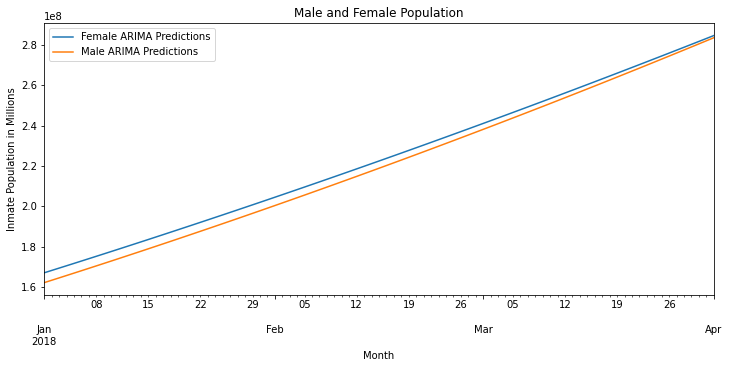

In [23]:
fem_pred.plot(figsize=(12,5), legend=True)
male_pred.plot(figsize=(12,5), legend=True)
plt.xlabel("Month")
plt.ylabel("Inmate Population in Millions")
plt.title('Male and Female Population')
plt.savefig("Images/2018_quarter.png")
plt.show()
